In [1]:
#import all what we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# We will use actual data drom online store to train with pandas and regression model
1) Merge currency exchange rate with our dataset
2) clean data for ml
3) Build Regression model

In [2]:
#Load data from proteplo
teplo=pd.read_csv('teplo.csv')

In [3]:
#Load data from cbs(Russian national bank),about currency exchange rate
kurs=pd.read_csv('kursd.csv',encoding = "ISO-8859-1",sep=';')

In [4]:
kurs.head()

,nominal,data,curs,cdx
0,1,10.01.2018,"57,0463",Äîëëàð ÑØÀ
1,1,11.01.2018,"56,8734",Äîëëàð ÑØÀ
2,1,12.01.2018,"56,9957",Äîëëàð ÑØÀ
3,1,13.01.2018,"56,6019",Äîëëàð ÑØÀ
4,1,16.01.2018,"56,3569",Äîëëàð ÑØÀ


In [5]:
#Drop unused columns
kurs=kurs.drop(columns=['nominal','cdx'])

In [6]:
#Rename columns before merging
kurs=kurs.rename(columns={"data": "Date", "curs": "Curs"})

In [7]:
kurs.head()

,Date,Curs
0,10.01.2018,"57,0463"
1,11.01.2018,"56,8734"
2,12.01.2018,"56,9957"
3,13.01.2018,"56,6019"
4,16.01.2018,"56,3569"


In [8]:
kurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    510 non-null    object
 1   Curs    510 non-null    object
dtypes: object(2)
memory usage: 8.1+ KB


In [9]:
teplo.head()

,Date,Weekday,ADS_perehod,SEO_perehod,Revenue_ads,Revenue_seo
0,01.01.2018,понедельник,218,191,"0,00","0,00"
1,02.01.2018,вторник,208,295,"0,00","0,00"
2,03.01.2018,среда,143,365,"0,00","0,00"
3,04.01.2018,четверг,160,421,"0,00","0,00"
4,05.01.2018,пятница,95,447,"0,00","0,00"


In [10]:
teplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         761 non-null    object
 1   Weekday      761 non-null    object
 2   ADS_perehod  761 non-null    int64 
 3   SEO_perehod  761 non-null    int64 
 4   Revenue_ads  761 non-null    object
 5   Revenue_seo  761 non-null    object
dtypes: int64(2), object(4)
memory usage: 35.8+ KB


In [11]:
#Merging two dataframes by column 'Date'
merged=pd.merge_ordered(teplo, kurs, fill_method='ffill', left_by='Date')

In [12]:
# As we can see there are a lot NAN values in 'Curs' column because currency exchange rate changes not every day(because of holidays)
merged.head(20)

,Date,Weekday,ADS_perehod,SEO_perehod,Revenue_ads,Revenue_seo,Curs
0,01.01.2018,понедельник,218,191,"0,00","0,00",NaN
1,02.01.2018,вторник,208,295,"0,00","0,00",NaN
2,03.01.2018,среда,143,365,"0,00","0,00",NaN
3,04.01.2018,четверг,160,421,"0,00","0,00",NaN
4,05.01.2018,пятница,95,447,"0,00","0,00",NaN
5,06.01.2018,суббота,59,404,"0,00","0,00",NaN
6,07.01.2018,воскресенье,111,422,"0,00","0,00",NaN
7,08.01.2018,понедельник,163,532,"0,00","0,00",NaN
8,09.01.2018,вторник,944,775,"0,00","0,00",NaN
9,10.01.2018,среда,865,792,"0,00","0,00","57,0463"


In [13]:
#We fill NA with next closest value
merged['Curs']=merged['Curs'].fillna(method='ffill')

In [14]:
merged.head(50)

,Date,Weekday,ADS_perehod,SEO_perehod,Revenue_ads,Revenue_seo,Curs
0,01.01.2018,понедельник,218,191,"0,00","0,00",NaN
1,02.01.2018,вторник,208,295,"0,00","0,00",NaN
2,03.01.2018,среда,143,365,"0,00","0,00",NaN
3,04.01.2018,четверг,160,421,"0,00","0,00",NaN
4,05.01.2018,пятница,95,447,"0,00","0,00",NaN
5,06.01.2018,суббота,59,404,"0,00","0,00",NaN
6,07.01.2018,воскресенье,111,422,"0,00","0,00",NaN
7,08.01.2018,понедельник,163,532,"0,00","0,00",NaN
8,09.01.2018,вторник,944,775,"0,00","0,00",NaN
9,10.01.2018,среда,865,792,"0,00","0,00","57,0463"


In [15]:
#Also we impute first curs values with 57 - it is currency exchange rate before holidays od 2018
merged['Curs']=merged['Curs'].fillna(57)

In [52]:
merged['Revenue_ads'].median()

165786.8

In [16]:
#Now we have to switch dyupes of some columns
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         761 non-null    object
 1   Weekday      761 non-null    object
 2   ADS_perehod  761 non-null    int64 
 3   SEO_perehod  761 non-null    int64 
 4   Revenue_ads  761 non-null    object
 5   Revenue_seo  761 non-null    object
 6   Curs         761 non-null    object
dtypes: int64(2), object(5)
memory usage: 41.7+ KB


In [17]:
#convert Curs column to float
merged['Curs']=merged['Curs'].replace(',','.', regex=True).astype(float)

In [18]:
merged['Revenue_ads'] = merged['Revenue_ads'].str.replace(' ', '')

In [19]:
merged['Revenue_ads'].replace('\s+', '',regex=True,inplace=True)

In [20]:
#convert Revenue_ads column to float, fix symbols
merged['Revenue_ads']=merged['Revenue_ads'].replace(',','.', regex=True).astype(float)


In [21]:
#convert Revenue_seo column to float,fix symbols
merged['Revenue_seo'] = merged['Revenue_seo'].str.replace(' ', '')
merged['Revenue_seo'].replace('\s+', '',regex=True,inplace=True)
merged['Revenue_seo']=merged['Revenue_seo'].replace(',','.', regex=True).astype(float)

In [22]:
#Once more look at dtypes
merged.dtypes

Date            object
Weekday         object
ADS_perehod      int64
SEO_perehod      int64
Revenue_ads    float64
Revenue_seo    float64
Curs           float64
dtype: object

In [23]:
#At last convert date to datetime and weekday to categorical variable 
merged=merged.astype({'Date': 'datetime64','Weekday': 'category'})

In [24]:
merged.dtypes

Date           datetime64[ns]
Weekday              category
ADS_perehod             int64
SEO_perehod             int64
Revenue_ads           float64
Revenue_seo           float64
Curs                  float64
dtype: object

In [25]:
merged.Revenue_ads.max()

6348057.0

In [26]:
merged.describe()

,ADS_perehod,SEO_perehod,Revenue_ads,Revenue_seo,Curs
count,761.000000,761.000000,7.610000e+02,7.610000e+02,761.000000
mean,881.678055,682.693824,2.200474e+05,9.535449e+04,63.635875
std,433.174455,209.473926,3.318417e+05,1.636671e+05,3.181559
min,12.000000,167.000000,0.000000e+00,0.000000e+00,55.671700
25%,596.000000,497.000000,5.342400e+04,1.964000e+04,62.343100
50%,935.000000,718.000000,1.657868e+05,5.870000e+04,64.081700
75%,1197.000000,825.000000,2.907360e+05,1.156900e+05,65.767400
max,2076.000000,1271.000000,6.348057e+06,2.682008e+06,69.974400


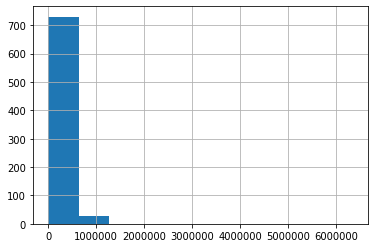

In [27]:
#brief glance on distribution of our target veariable before modelling
merged.Revenue_ads.hist()

In [28]:
# we will use pycaret lib
from pycaret.regression import *

In [43]:
#We have to rename weekdays,otherwise pycaret wont work
merged['Weekday']=merged['Weekday'].replace({'понедельник': 1, 'вторник': 2,'среда':3,'четверг':4,'пятница':5,'суббота':6,'воскресенье':7})

In [44]:
merged.head()

,Date,Weekday,ADS_perehod,SEO_perehod,Revenue_ads,Revenue_seo,Curs
0,2018-01-01,1,218,191,0.0,0.0,57.0
1,2018-02-01,2,208,295,0.0,0.0,57.0
2,2018-03-01,3,143,365,0.0,0.0,57.0
3,2018-04-01,4,160,421,0.0,0.0,57.0
4,2018-05-01,5,95,447,0.0,0.0,57.0


In [45]:
#preprocessing using pycaret This is baseline we wont change anything yet
reg = setup(data = merged, target = 'Revenue_ads', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(761, 7)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [46]:
#good article about https://hrngok.github.io/posts/metrics/
# Also in future we have to work wit data,remove outliers
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,TheilSen Regressor,125146.534800,127088556002.917007,277193.904100,0.271600,3.468800,3.561100
1,Huber Regressor,122359.776500,128628940106.468399,279456.207900,0.258100,3.256300,2.161400
2,Random Sample Consensus,123275.374600,128531362570.177094,279548.247600,0.257300,3.511500,2.479900
3,Elastic Net,129171.061600,126913111601.906204,279106.043500,0.246400,3.450500,4.273100
4,AdaBoost Regressor,149954.472100,132866343396.951202,290250.252100,0.164500,3.829300,7.424500
5,Ridge Regression,142892.355500,131240934526.115601,290167.787700,0.156600,3.612400,6.075100
6,Lasso Least Angle Regression,143497.871100,131475150043.051300,290724.491700,0.151800,3.617500,6.197700
7,Linear Regression,143530.624800,131491272733.083206,290760.541400,0.151500,3.617800,6.191000
8,Lasso Regression,143525.552900,131489248012.228394,290755.783600,0.151500,3.617700,6.188700
9,Least Angle Regression,144624.405900,131900717207.687897,291946.866800,0.135400,3.645700,6.216000


In [56]:
#Create TheilSen Regressor, with 5 folds
TheilSen=create_model('tr', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,125898.2258,3.285480e+10,181258.9199,0.2937,3.2954,2.7228
1,130383.4848,1.257338e+11,354589.6448,0.0783,2.6489,0.9558
2,161514.5068,3.739672e+11,611528.5413,0.0325,4.1854,3.2135
3,91528.8235,1.382108e+10,117563.0771,0.5196,3.9298,7.5091
4,119884.5200,8.844502e+10,297397.0829,0.0498,3.5493,2.9877
Mean,125841.9122,1.269644e+11,312467.4532,0.1948,3.5218,3.4778
SD,22387.6825,1.297333e+11,171255.5544,0.1877,0.5331,2.1676


In [57]:
# Tunning model, R2 increased
tuned_TS = tune_model('tr', n_iter = 25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,126806.0114,3.428406e+10,185159.5408,0.3468,2.9263,2.2303
1,122672.1387,3.073291e+10,175308.0336,0.2258,3.5642,3.9435
2,110616.2047,4.157131e+10,203890.4386,0.3520,2.6673,1.2195
3,148774.3761,2.079300e+11,455993.3765,0.0128,2.6109,0.6967
4,218638.4898,7.339128e+11,856687.0879,-0.0041,3.6000,3.7063
5,105047.0983,1.673402e+10,129360.0460,0.4832,4.6873,2.1301
6,94964.6969,1.516697e+10,123154.2430,0.3916,2.9141,2.5528
7,88611.7104,1.262390e+10,112356.1124,0.6107,4.7655,12.7896
8,137392.2456,1.616644e+11,402075.1619,-0.0016,3.6251,4.2665
9,100543.8927,1.648432e+10,128391.2721,0.2965,3.6201,1.2946


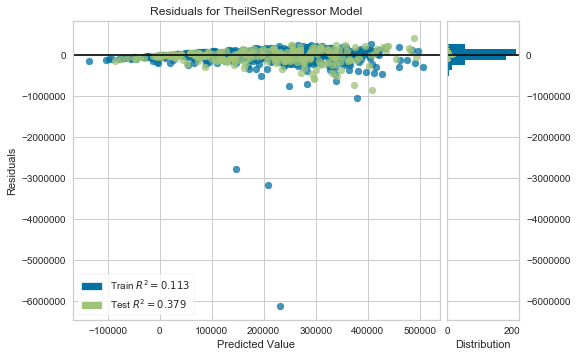

In [59]:
# Residuals plot
#At average predictions were highier. We have few outliers where predictions were much highier than observed value.
plot_model(tuned_TS)

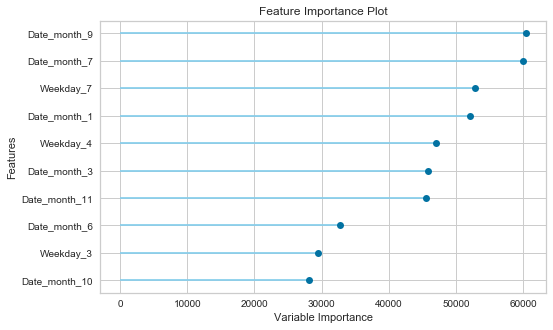

In [62]:
# Plot feature importance. As we can see for this model most valuable features are date of month and weekday
plot_model(tuned_TS,plot='feature')

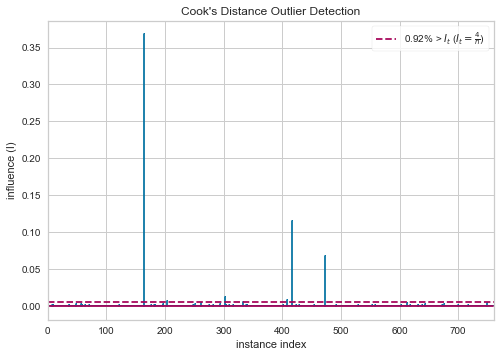

In [64]:
# Look at cooks distance. We clearly have outliers between 100 and 200 indexes. We should check it later.
plot_model(tuned_TS,plot='cooks')

In [68]:
#Final results for our baseline model. 
predict_model(tuned_TS)

#ALSO we can finalize and save model but wont do this right now,because there are a lot of imrovements have to be done
#final_TS = finalize_model(tuned_TS)
#save_model(final_TS,'Final TS 16May2020')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Theil Sen Regressor,110166.8358,2.657422e+10,163016.0266,0.3793,3.4033,1.1235


,ADS_perehod,SEO_perehod,Revenue_seo,Curs,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,...,Date_weekday_1,Date_weekday_2,Date_weekday_3,Date_weekday_4,Date_weekday_5,Date_weekday_6,Date_is_month_end_1,Date_is_month_start_1,Revenue_ads,Label
0,824.0,856.0,92089.0,67.3911,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,101011.0,205766.8541
1,761.0,732.0,247845.0,66.4725,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,304421.0,269879.0039
2,186.0,387.0,0.0,65.9961,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,427.5380
3,1000.0,498.0,29421.0,64.6423,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166663.0,137953.1259
4,1001.0,468.0,0.0,64.0817,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,55147.0,69469.7586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1412.0,852.0,26590.0,61.6659,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476133.0,366603.8294
225,1447.0,736.0,79079.0,64.0817,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143349.0,308043.6512
226,1070.0,860.0,146330.0,67.3963,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273865.0,246768.2002
227,1094.0,827.0,580.0,57.1072,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217528.0,234798.7581


MAIN point here: we clearly have outliers. And our first step for improvement will be to deal with them. We should logtransform features to remove outliers.(http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)
https://pycaret.org/remove-outliers/

In [89]:
# Add "remove outliers" and 'transformation' to the setup
reg_out=setup(data = merged, target = 'Revenue_ads', remove_outliers = True,transformation = True)
TheilSen2=create_model('tr', fold = 5)
tuned_TS2 = tune_model('tr', n_iter = 25)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,98370.0804,1.584859e+10,125891.1837,0.4193,4.1211,1.5384
1,91172.4622,1.270989e+10,112738.1688,0.4906,3.3536,1.2852
2,133045.2589,4.247975e+10,206106.1693,0.1617,3.7786,2.6783
3,177810.0919,1.920397e+11,438223.3511,-0.0135,3.1915,1.0531
4,136572.5667,4.473546e+10,211507.5768,0.3280,3.6047,1.7433
5,137788.5712,3.188937e+10,178575.9451,0.3125,2.0449,20.9301
6,108817.5444,2.238895e+10,149629.3837,0.4592,3.5747,4.2247
7,104169.5506,2.011799e+10,141837.8981,0.2198,3.2814,2.7109
8,221788.8576,7.779022e+11,881987.6670,-0.0024,3.6785,2.4604
9,124298.4828,2.635340e+10,162337.2926,0.2290,3.1203,3.4943


We have great imporovement over our last results. MAE now 98370 and R2 0.4193

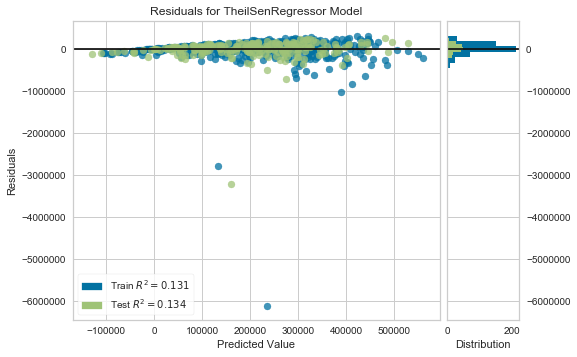

In [90]:
# Residuals plot
plot_model(tuned_TS2)

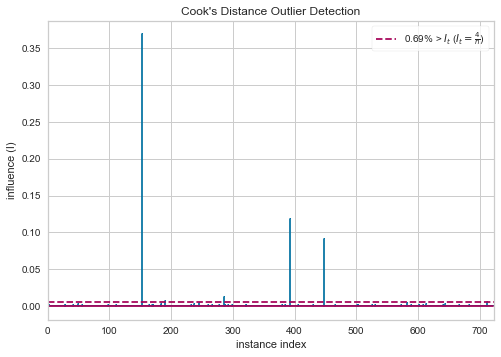

In [91]:
# Cooks distance. 
plot_model(tuned_TS2,plot='cooks')

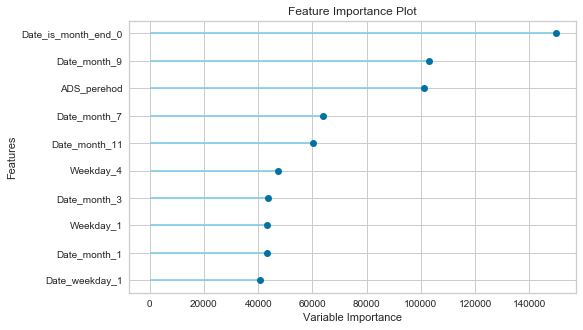

In [93]:
# Plot feature importance.  
plot_model(tuned_TS2,plot='feature')

We still have outliers but transformation helped a lot, and metrics improved. 